In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import sketch

# 1. Data Inspection

In [2]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Checking Null Values

In [22]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Duplicate records

In [191]:
df.duplicated().sum()

1081

### Duplicated Fraud transactions

In [192]:
df.loc[df.duplicated() & df['Class']==1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
102442,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
102443,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
102444,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
102445,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
102446,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
141258,84204.0,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,...,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.00,1
141260,84204.0,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,...,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,512.25,1
143334,85285.0,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,...,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.00,1
143336,85285.0,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,...,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92,1
150661,93853.0,-6.185857,7.102985,-13.030455,8.010823,-7.885237,-3.974550,-12.229608,4.971232,-4.248307,...,2.502772,0.481691,0.480958,0.360319,-0.293354,-0.199193,-0.203917,0.398927,44.90,1


**We have some Fraud transactions duplicated even more than twice this maybe data collecting error or maybe these all were actually Fraud transaction that repeated with exact same figures**

In [22]:
df.drop_duplicates(inplace=True)

In [20]:
# mask = df > 0
# mask_all = mask.all(axis=1)
# df_positive = df[mask_all]

# df_positive

### Correlation of features with the target

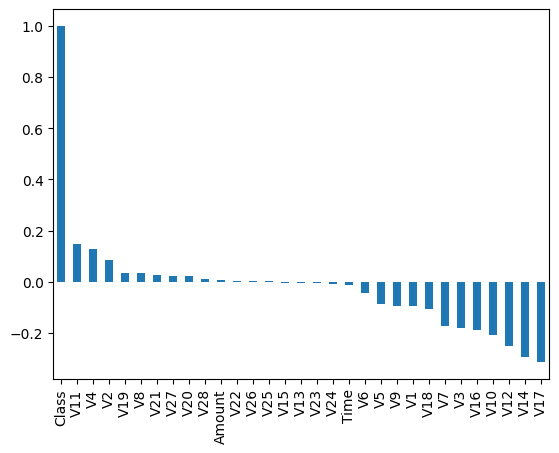

In [23]:
df.corr()['Class'].sort_values(ascending=False).plot(kind='bar')
plt.show()

### Checking Multicollinearinty in the independent columns

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# creating dummies for gender
# the independent variables set
X = df.iloc[:, :-1]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

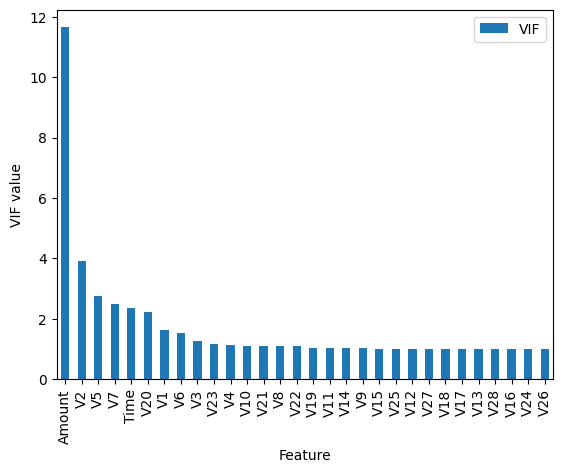

In [30]:
vif_data.set_index('feature').sort_values(by='VIF', ascending=False).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('VIF value')
plt.show()

**For a good model VIF should be less than 5 so we will have to transform our data**

### Transforming data and checking VIF again

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
# I cannot use log tranformation as there are alot negative values almost in every row of our data so yeo-johnson method wil be nice
column_trans = ColumnTransformer(
    [('yeo-johnson', PowerTransformer(method='yeo-johnson'), list(df.iloc[:,:-1].columns))],
    remainder='passthrough'
)
transformed = column_trans.fit_transform(df)
df_tr = pd.DataFrame(transformed, columns=df.columns)
df_tr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.435030,-0.908517,-0.131109,2.174201,0.986309,-0.257317,0.460075,0.195593,0.022528,0.382316,...,-0.009113,0.368766,-0.190040,0.014889,0.212398,-0.323989,0.326111,-0.055175,1.117873,0.0
1,-2.435030,0.625754,0.094915,-0.033947,0.389851,0.031415,0.046651,-0.063677,0.008792,-0.183999,...,-0.302964,-0.885006,0.153295,-0.637695,0.288921,0.353565,-0.038270,0.056557,-1.129040,0.0
2,-2.434772,-0.907941,-0.873965,1.381479,0.343686,-0.376027,1.321920,0.643991,0.176162,-1.455515,...,0.360668,1.070494,1.502750,-1.133754,-0.653256,-0.209921,-0.155875,-0.176605,1.622430,0.0
3,-2.434772,-0.745930,-0.202749,1.401190,-0.579730,-0.019788,0.984293,0.193974,0.314385,-1.321162,...,-0.135973,-0.011101,-0.318214,-1.757165,1.276986,-0.400100,0.144505,0.201741,1.011323,0.0
4,-2.434542,-0.827019,0.535699,1.161194,0.359431,-0.306955,0.188177,0.482810,-0.333172,0.772533,...,0.003346,1.108704,-0.233430,0.145653,-0.428861,1.053957,0.547559,0.673579,0.691723,0.0


In [34]:
X = df_tr.iloc[:, :-1]

# VIF dataframe
vif_data_tr = pd.DataFrame()
vif_data_tr["feature"] = X.columns

# calculating VIF for each feature
vif_data_tr["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

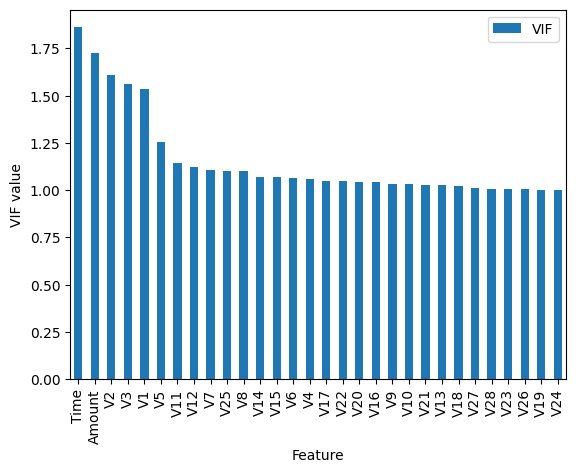

In [31]:
vif_data_tr.set_index('feature').sort_values(by='VIF', ascending=False).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('VIF value')
plt.show()

**The power transformer solved the issue**

# 2. EDA

In [37]:
def make_histograms(df=df,rows=10,cols=3,figsize=(20,20)):
    num_columns = list(df.select_dtypes(include=np.number).columns)
    fig ,ax = plt.subplots(rows,cols,figsize=figsize)
    for j in range(rows):
        for i in range(cols):
            try:
                sns.histplot(data=df,x=num_columns[0],kde=True,bins=20,ax=ax[j][i])
                num_columns.pop(0)
            except:
                fig.delaxes(ax=ax[j][i])
    fig.suptitle('Histograms of numerical columns', fontsize=16)
    plt.show()
def make_boxplots(df=df,rows=3,cols=2,figsize=(15,15)):
    num_columns = list(df.select_dtypes(include=np.number).columns)
    fig ,ax = plt.subplots(rows,cols,figsize=figsize)
    for j in range(rows):
        for i in range(cols):
            try:
                sns.boxplot(data=df,x=num_columns[0],ax=ax[j][i])
                num_columns.pop(0)
            except:
                fig.delaxes(ax=ax[j][i])
    fig.suptitle('Boxplots of numerical columns', fontsize=16)
    plt.show()


### Numerical distribution of features

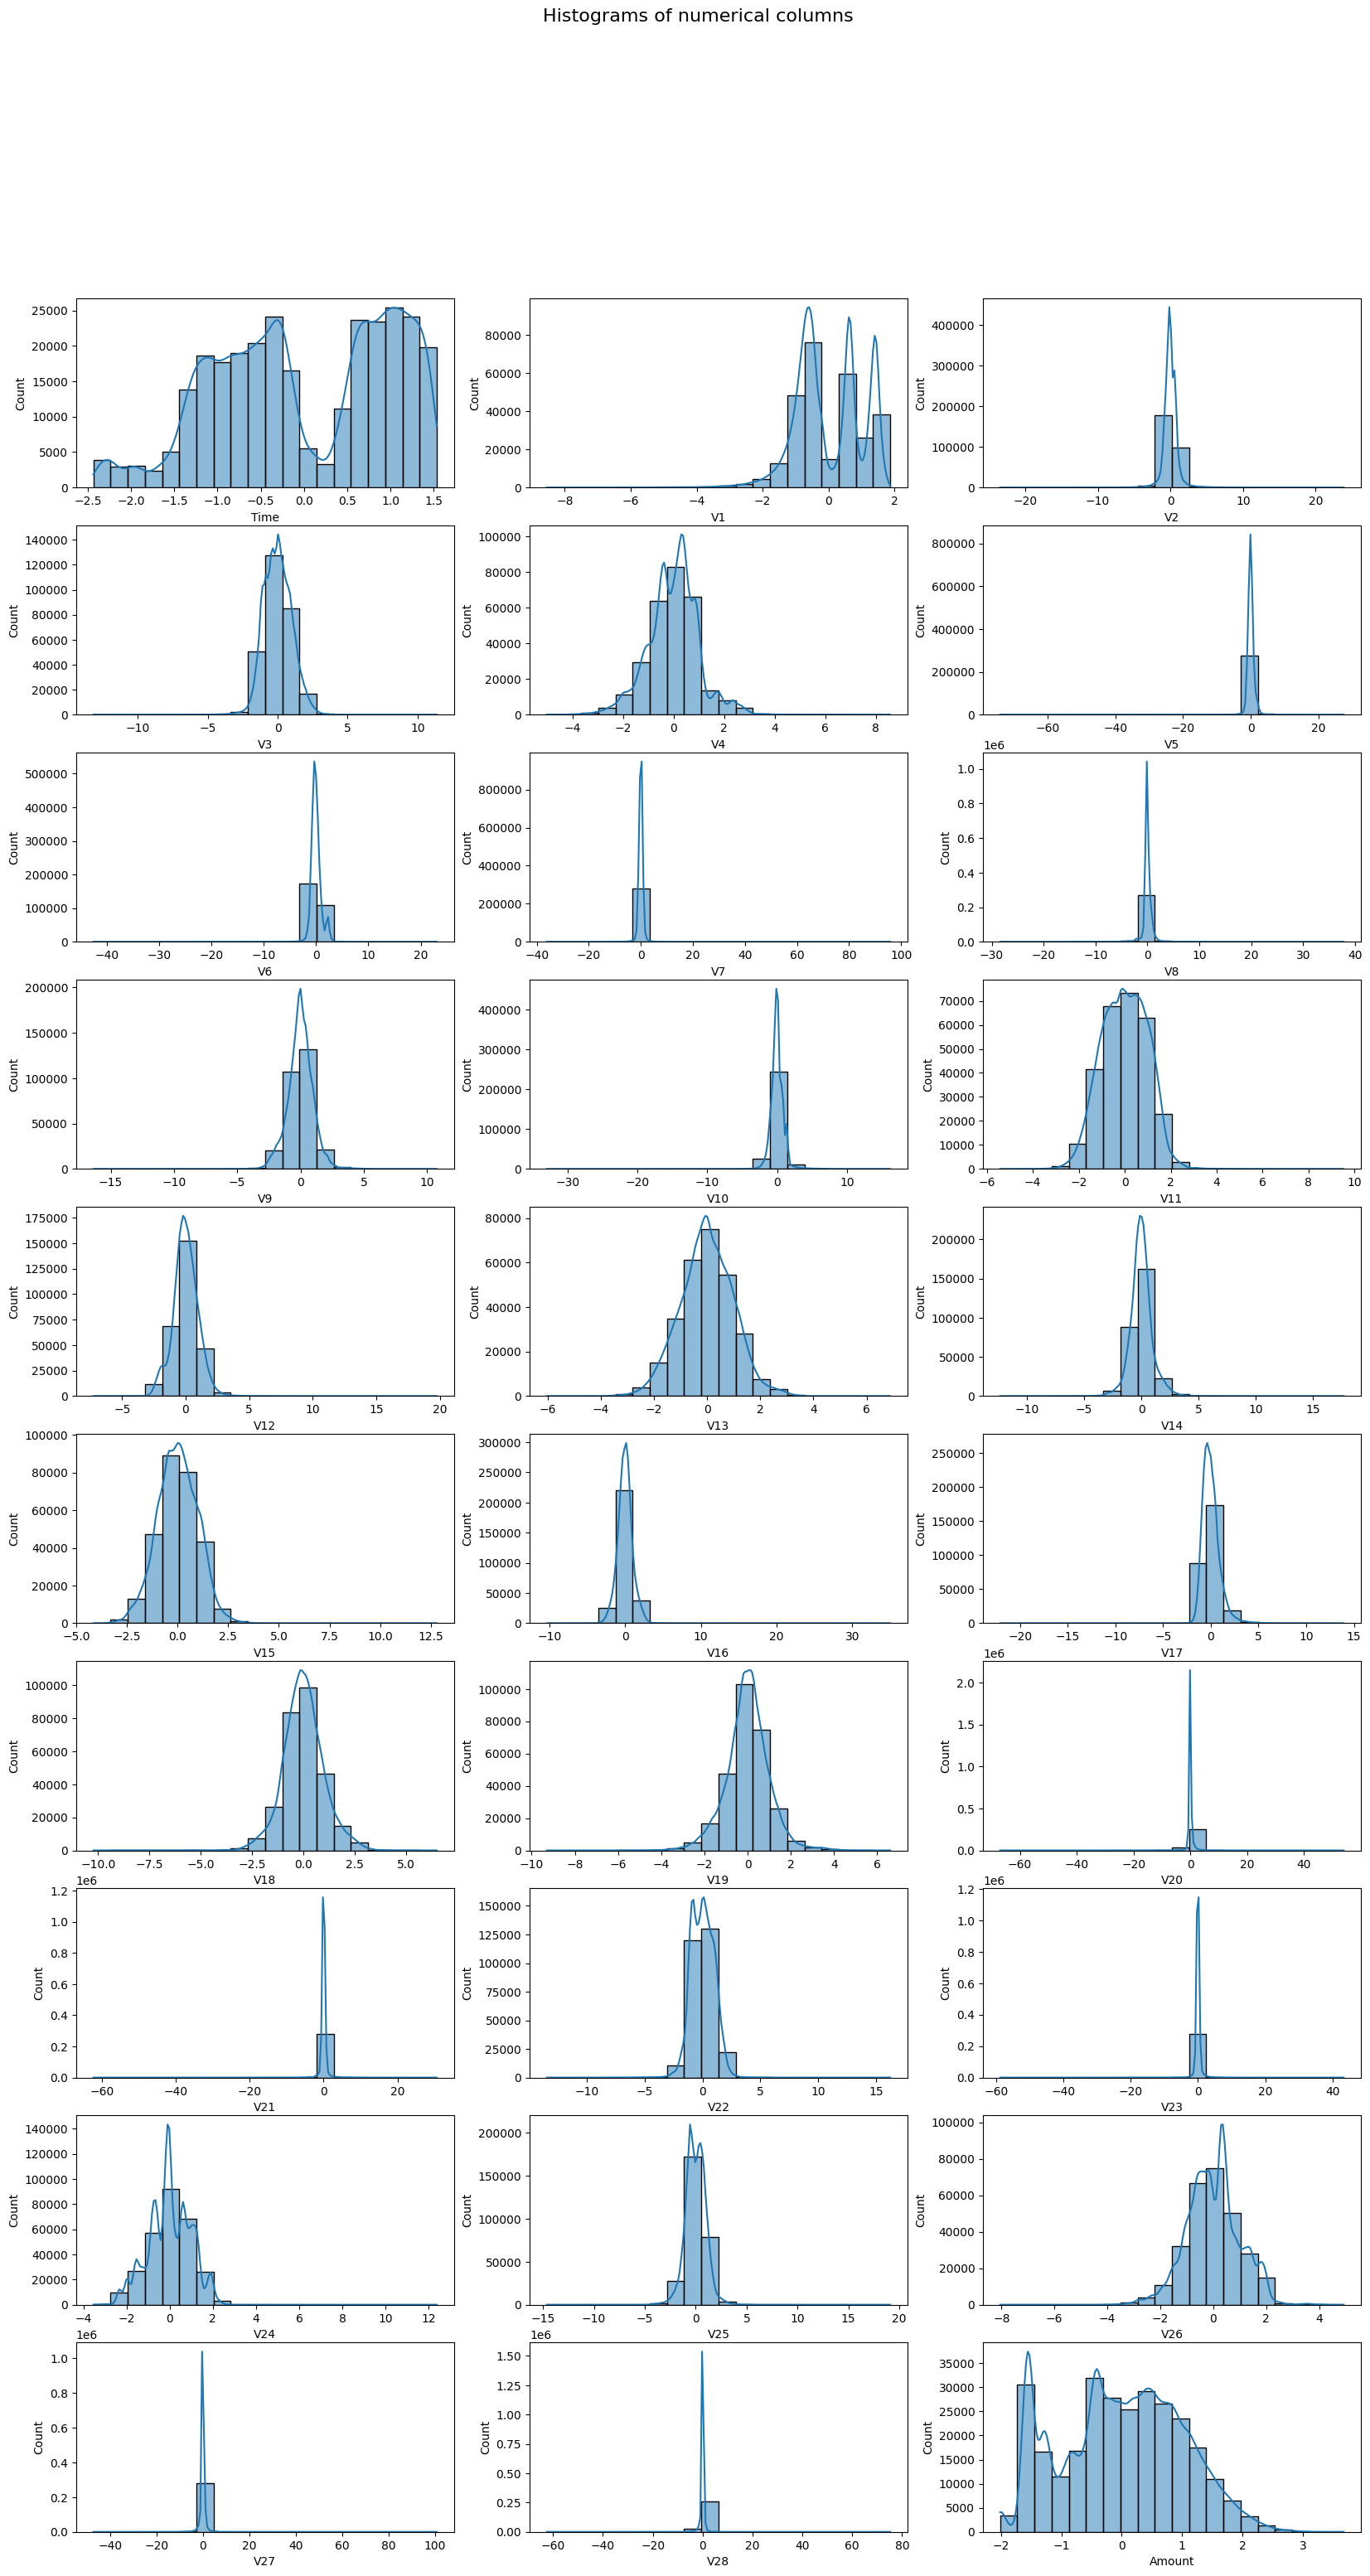

In [40]:
make_histograms(df_tr,10,3,(20,35))

### Target Class distribution

Class
0.0    282174
1.0       473
Name: count, dtype: int64


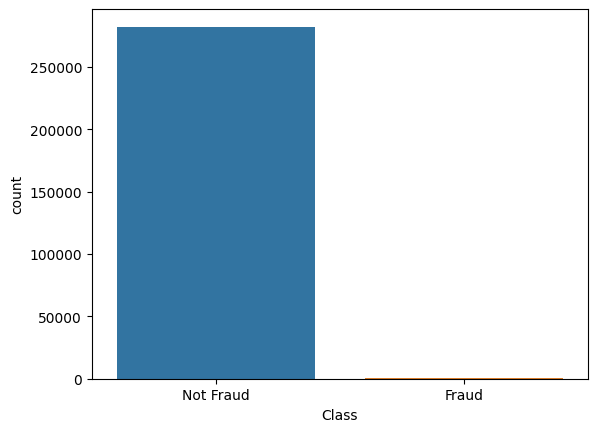

In [43]:
ax = sns.countplot(data=df_tr,x='Class')
ax.set_xticklabels(['Not Fraud', 'Fraud'])
print(df_tr['Class'].value_counts())
plt.show()

**We have only 473 cases of Fraud transaction**

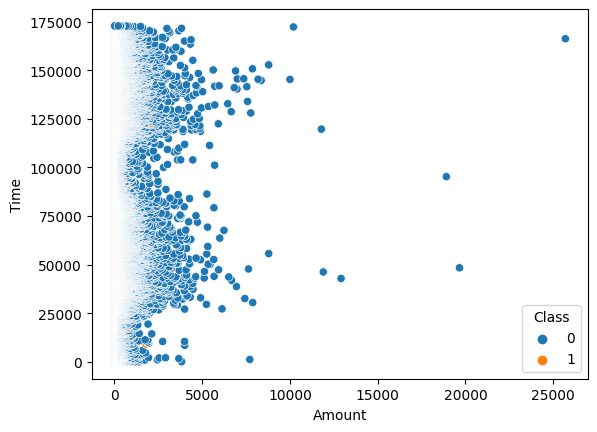

In [45]:
sns.scatterplot(data=df,x='Amount',y='Time',hue='Class')
plt.show()

**By changing x axis limit we can see more values**

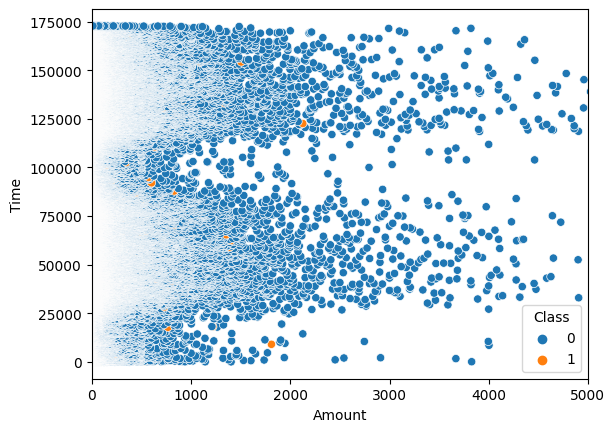

In [46]:
sns.scatterplot(data=df,x='Amount',y='Time',hue='Class')
plt.xlim(0,5000)
plt.show()

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


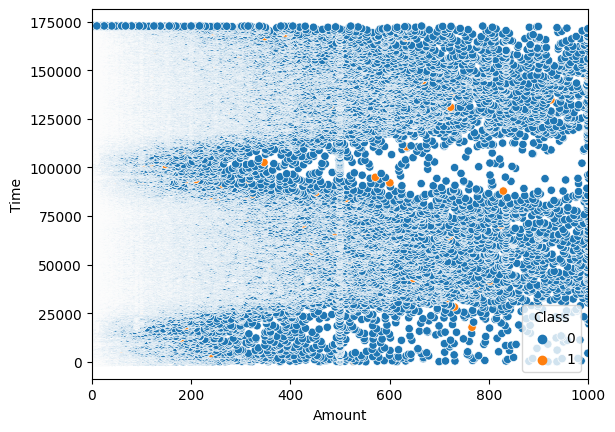

In [48]:
sns.scatterplot(data=df,x='Amount',y='Time',hue='Class')
plt.xlim(0,1000)
plt.show()

# 3. Model Building

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,VotingClassifier,AdaBoostClassifier

In [48]:
X = df_tr.drop('Class', axis=1)
y = df_tr['Class']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101,stratify=y)

### We have stratified split with equal percentage fraud and non fraud classes in test and train set 

In [50]:
print(f'percentage of Fraud in train set {len(y_train[y_train.values==1])/len(X_train)*100:.2f} %')
print(f'percentage of non-Fraud in train set {len(y_train[y_train.values==0])/len(X_train)*100:.2f} %')
print(f'percentage of Fraud in test set {len(y_test[y_test.values==1])/len(X_test)*100:.2f} %')
print(f'percentage of non-Fraud in test set {len(y_test[y_test.values==0])/len(X_test)*100:.2f} %')

percentage of Fraud in train set 0.17 %
percentage of non-Fraud in train set 99.83 %
percentage of Fraud in test set 0.17 %
percentage of non-Fraud in test set 99.83 %


## What do we need?

***As we need to find every transaction that is a Fraud so we want to reduce the number of false negatives in our result. It can be done by increasing recall score.***

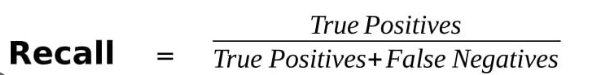

**But due to precision recall tradeoff our model will start to classify transactions that are not fraud as fraud. But we need to focus on fraud transactions so we will tend to maximize recall**

### our data is extremely imbalanced we will try to change the class weights to get maximum recall score

In [55]:
weights = [50,60,70,80,100,120]
for weight in weights:
    lg =  LogisticRegression(max_iter=500,C=0.1, class_weight={0: 1, 1: weight})
    lg.fit(X_train, y_train)
    lg_pred = lg.predict(X_test)
    print(f'for class weight of 0:1 and 1:{weight}')
    print(f'precision {precision_score(y_test, lg_pred):.3f}')
    print(f'recall {recall_score(y_test, lg_pred):.3f}')
    print(f'f1 {f1_score(y_test, lg_pred):.3f}')

for class weight of 0:1 and 1:50
precision 0.464
recall 0.824
f1 0.594
for class weight of 0:1 and 1:60
precision 0.403
recall 0.838
f1 0.545
for class weight of 0:1 and 1:70
precision 0.357
recall 0.838
f1 0.501
for class weight of 0:1 and 1:80
precision 0.316
recall 0.838
f1 0.459
for class weight of 0:1 and 1:100
precision 0.246
recall 0.838
f1 0.380
for class weight of 0:1 and 1:120
precision 0.204
recall 0.838
f1 0.328


### So, the best value for wieghts of 1 is 60

In [148]:
lg =  LogisticRegression(max_iter=500,C=0.1, class_weight={0: 1, 1: 60},random_state=101)
lg.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight={0: 1, 1: 60}, max_iter=500,
                   random_state=101)

In [149]:
lg_pred = lg.predict(X_test)
print(f'precision score :{precision_score(y_test, lg_pred):.3f}')
print(f'recall score :{recall_score(y_test, lg_pred):.3f}')
print(f'f1 score :{f1_score(y_test, lg_pred):.3f}')

precision score :0.403
recall score :0.838
f1 score :0.545


In [58]:
lg_pred_train = lg.predict(X_train)
print(f'precision score :{precision_score(y_train, lg_pred_train):.3f}')
print(f'recall score :{recall_score(y_train, lg_pred_train):.3f}')
print(f'f1 score :{f1_score(y_train, lg_pred_train):.3f}')

precision score :0.223
recall score :0.891
f1 score :0.356


**So there is not much overfitting**

### Using enesembles

In [151]:
bag_clf = BaggingClassifier(
    estimator=lg,
    max_samples=0.9,
    n_estimators=10,
    bootstrap=True,
    random_state=101,
    bootstrap_features=True
)
bag_clf.fit(X_train, y_train)
bag_pred = bag_clf.predict(X_test)

print(f'precision score :{precision_score(y_test, bag_pred):.3f}')
print(f'recall score :{recall_score(y_test, bag_pred):.3f}')
print(f'f1 score :{f1_score(y_test, bag_pred):.3f}')

precision score :0.586
recall score :0.817
f1 score :0.682


In [152]:
lr1 = LogisticRegression(max_iter=500,C=0.1, class_weight={0: 1, 1: 60},random_state=101)
lr2 = LogisticRegression(max_iter=500,C=0.1, class_weight={0: 1, 1: 40},random_state=101)
lr3 =LogisticRegression(max_iter=500,C=0.1, class_weight={0: 1, 1: 100},random_state=101)
lr4 = LogisticRegression(max_iter=500,C=0.1, class_weight={0: 1, 1: 80},random_state=101)
voting_clf = VotingClassifier(
    estimators=[('lr1', lr1), ('lr2', lr2),('lr3', lr3), ('lr4', lr4)],
    voting='soft', 
#     weights=[1,0.9,0.8,0.7]
)
voting_clf.fit(X_train, y_train)
vot_pred = voting_clf.predict(X_test)

print(f'precision score :{precision_score(y_test, vot_pred):.3f}')
print(f'recall score :{recall_score(y_test, vot_pred):.3f}')
print(f'f1 score :{f1_score(y_test, vot_pred):.3f}')

precision score :0.373
recall score :0.838
f1 score :0.516


### Bagging classifier has the best roc auc score

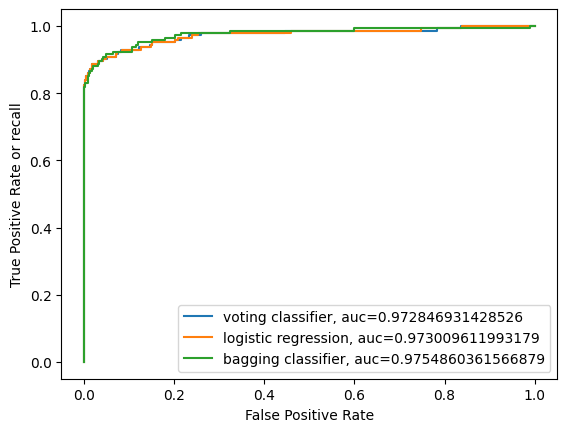

In [145]:
lg_pred_proba = lg.predict_proba(X_test)[:,1]
# calculate AUC of model
auc_lg = roc_auc_score(y_test, lg_pred_proba)
fpr_lg, tpr_lg, _ = roc_curve(y_test,  lg_pred_proba)
bag_pred_proba = bag_clf.predict_proba(X_test)[:,1]
# calculate AUC of model
auc_bag = roc_auc_score(y_test, bag_pred_proba)
fpr_bag, tpr_bag, _ = roc_curve(y_test,  bag_pred_proba)
vot_pred_proba = voting_clf.predict_proba(X_test)[:,1]
# calculate AUC of model
auc_vot = roc_auc_score(y_test, vot_pred_proba)
fpr_vot, tpr_vot, _ = roc_curve(y_test,  vot_pred_proba)
plt.plot(fpr_vot,tpr_vot,label="voting classifier, auc="+str(auc_vot))
plt.plot(fpr_lg,tpr_lg,label="logistic regression, auc="+str(auc_lg))
plt.plot(fpr_bag,tpr_bag,label="bagging classifier, auc="+str(auc_bag))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate or recall')
plt.show()

### While Logistic regression produces a good classification matrix based on our problem

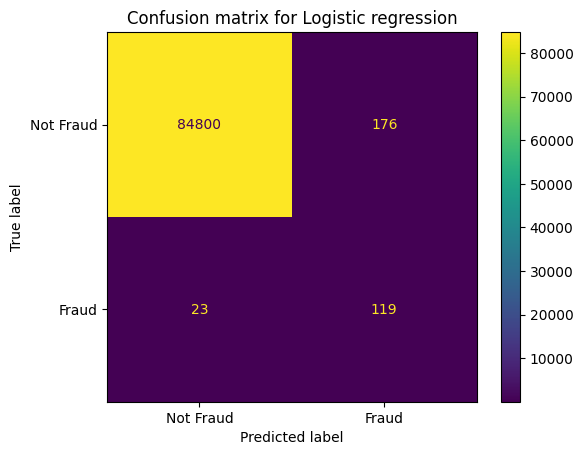

In [155]:
matrix = confusion_matrix(y_test, lg_pred)
matrix_display = ConfusionMatrixDisplay(matrix,display_labels=['Not Fraud','Fraud'])
matrix_display.plot()
plt.title('Confusion matrix for Logistic regression')
plt.show()

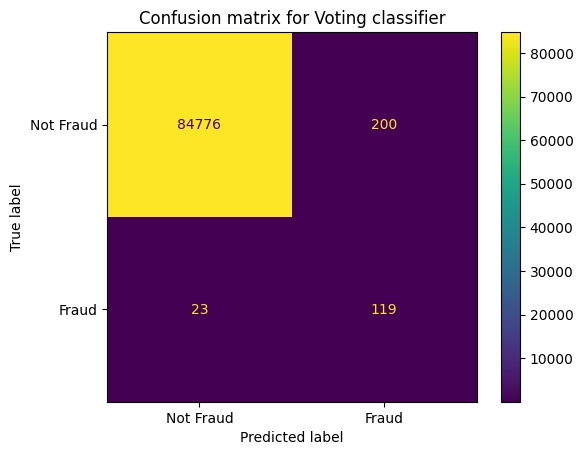

In [156]:
matrix = confusion_matrix(y_test, vot_pred)
matrix_display = ConfusionMatrixDisplay(matrix,display_labels=['Not Fraud','Fraud'])
matrix_display.plot()
plt.title('Confusion matrix for Voting classifier')
plt.show()

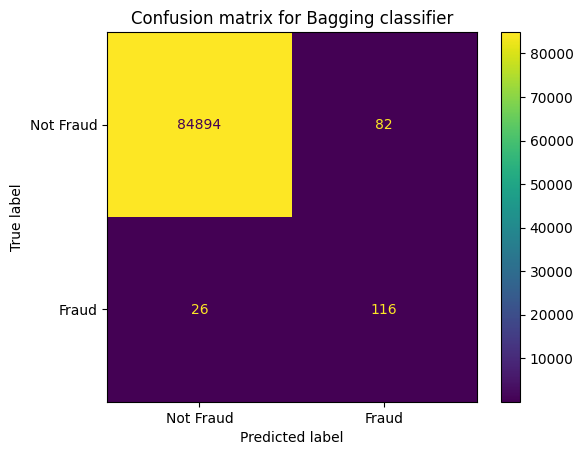

In [157]:
matrix = confusion_matrix(y_test, bag_pred)
matrix_display = ConfusionMatrixDisplay(matrix,display_labels=['Not Fraud','Fraud'])
matrix_display.plot()
plt.title('Confusion matrix for Bagging classifier')
plt.show()

### We can further increse recall by lowering the threshold for logistic regression

In [93]:
lg_pred_new_threshold = (lg.predict_proba(X_test)[:, 1] >= 0.3).astype(int)

# Evaluation metrics for new threshold
print("Evaluation metrics with threshold 0.3:")
print("Accuracy:", accuracy_score(y_test, lg_pred_new_threshold))
print("Precision:", precision_score(y_test, lg_pred_new_threshold))
print("Recall:", recall_score(y_test, lg_pred_new_threshold))
print("F1 Score:", f1_score(y_test, lg_pred_new_threshold))

Evaluation metrics with threshold 0.3:
Accuracy: 0.9941023050353627
Precision: 0.2009966777408638
Recall: 0.852112676056338
F1 Score: 0.3252688172043011


### KIndly upvote if you like 